## <span style="color:black">Integrate and Fire</span>

Implement a simulation of an integrate-and-fire neuron that is injected with varying levels of current. Run each simulation for 500 ms in time increments of 0.1 ms with the membrane starting at its resting potential of -70 mV, and the current pulse starting 100 ms into the simulation and continuing for 300 ms. Assume that the 1.52 nA current pulse is above threshold and will cause spiking. You may use the following parameter values for your simulation:


\begin{equation*}
R_m = 10M\Omega
\end{equation*}
\begin{equation*}
\tau_m = 10ms
\end{equation*}
\begin{equation*}
V_{threshold} = -55mV
\end{equation*}
\begin{equation*}
V_{reset} = -75mV
\end{equation*}
\begin{equation*}
V_{spike} = +20mV
\end{equation*}

In class, we implemented the equations and didn't see any spikes. The Integrate and Fire model is a LIE because it only fires when we add the spikes ourselves. To add spikes into our simulation we will need to:
- check whether the current voltage value is above the threshold value
- if so, (and it is not equal to $V_{spike}$), then the next voltage value should be $V_{spike}$.
- however, if it is currently at $V_{spike}$, then the next voltage value should be $V_{reset}$.

In the code block below, use the parts that you have built from class to fill in the simulation.

0


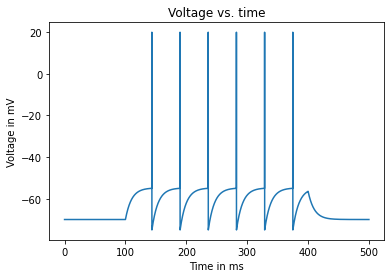

In [2]:
# Step 1: define all of your starting parameters
import numpy as np
import matplotlib.pyplot as plt

dt = .1
tFinal = 500
tStimStart = 100
tStimEnd = 400
E = -70
Vth = -55
Vreset = -75
Vspike = 20
Rm = 10
tau = 10
iStim = 1.52

# Step 2: Set up the data structures that you will graph. 
# Initialize them with zeros to speed up your code
timeVector = np.arange(0, 500, .1) # Hint: A sequence from 0 to 500 ms in steps of 0.1 ms 
Vvector = np.zeros(5000)
Ivector = np.zeros(5000)
plotVector = np.zeros(5000)
Ivector[1000:4000] = iStim
# Setting this to zero now will allow you to see what the simulation is like without external stimulation

# Step 3: Set up initial conditions
# Hint: at t=0, your voltage is equal to your resting potential
Vvector[0] = E
plotVector[0] = E
spikeCount = 0

# Step 4: Integrate the equation tau*dV/dt = -V + EL + currentVector*Rm
# For-loop to calculate Vinf and store values in Vvector
for j in range(len(timeVector)-1):
    # Calculating Vinf
    Vinf = E + Ivector[j]*Rm

    # Calculating the voltage
    Vvector[j+1] = Vinf + (Vvector[j]-Vinf)*np.exp(-dt/tau)
    
    if Vvector[j+1] >= Vth:
        Vvector[j+1] = Vspike
        
        if Vvector[j]==Vspike:
            Vvector[j+1] = Vreset
            

# Plotting the voltage over time
plt.figure()
plt.plot(timeVector, Vvector)
plt.ylabel('Voltage in mV')
plt.xlabel('Time in ms')
plt.title('Voltage vs. time')
print(spikeCount)

It's also a good idea to add a counter so that we can count the number of "spikes" generated. This will be helpful when we calculate the firing rate later.

In [ ]:
# Your code here (it's fine to copy-paste from above and then add counter)

### Now, it's time to test with multiple current values!

So far, we have made our simulated neuron fire to one level of injected current. Below is a template for getting your model to create and test several different currents. 

We are going to do this using a *nested for loop*. In the outer loop, we will loop through different levels of external stimulation, and for each of these, we will run the integrate and fire simulation at each time step.

Put your code into the template to see your graph.

In [ ]:
# Step 1: Define your variables and parameters

# Step 2: Define stimulation values
plotNum = 0
IstimVector = np.array([1.4, 1.44 1.51, 1.54, 1.58, 1.62])


# Step 3: loop through stimulation values
for stim in range():  # fill the parentheses in accordingly
    plotNum = += 1 # increments the plot number to make the graphs come out (graphs start counting at 1)
    
    # Set up the data structures that you are going to graph
    
    # Set the initial values
    
    # Define the stimulus according to the "stim-th" current value
    
    # In this inner loop, your simulation runs as usual
    for j in range(): # fill the parentheses in accordingly
        
        # Check present voltage value and see if we need to change them to Vspike or Vreset
        
        # Rest of simulation runs as in class
        
    
    # Step 4: Make plots
    plt.figure(figsize=(80,3))
    plt.subplot(2,len(IstimVector),plotNum)
    plt.plot(XXX,YYY) # fill this in accordingly
    
    # nothing needs to be changed here, but can you follow what is being done?
    if plotNum == 1:
        plt.title('Voltage vs time')
    elif plotNum == len(IstimVector):
        plt.xlabel('Time in msec')
    plt.ylabel('Voltage in mV') 

If completed correctly, your graph should look like this:
<img src="Fig.jpg" alt="drawing" width="600"/>

At this point, we need to compute the firing rate for the neuron. The most straightforward way of doing this is to count up how many spikes occured and to divide by the amount of time the stimulation was on.

Note: **Not** the length of the entire simulation (can you see why?).

In the space below, copy and paste your simulation from above. Add a variable to count the number of spikes in the threshold conditional and a line beneath each integration loop to calculate the rates. Save each of the rates in a vector and plot them versus their corresponding currents.

In [ ]:
# your code here

Great work! You have implemented your first neural model! Let's take some time to reflect on what you have learned. Answer the following questions in the cells below:

What is the relationship between injected current and firing rate?

In [170]:
# Answer:

What will happen when we increase the current even more? Will the firing rate ever stop increasing? Why/why not?

In [ ]:
# Answer:

How realistic is this model of a neuron? Name at least one aspect of the model that seems realistic, and one that is contrived. For the aspects that you find lacking, can you think of ways of making it more biologically plausible?

In [171]:
# Answer:

Export this file as a PDF and upload to Lyceum for grading. Nice work today!